In [ ]:

import tensorflow.lite as tflite
import tensorflow.compat.v1 as tf
import tensorflow as tf
import tensorflow as tfjs
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf






load cifar10 data :as a return we get (X_train, y_train),(X_test,y_test)


In [ ]:
(X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape


170498071/170498071 [==============================] - 7s 0us/step


(50000, 32, 32, 3)

In [ ]:
import pathlib
dataset_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
data_dir = tf.keras.utils.get_file('CIFAR-10-images-master', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
import pathlib
dataset_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
data_dir = tf.keras.utils.get_file('CIFAR-10-images-master', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

The training set contains 50,000 images of 32 x 32 pixels in 3 RGB channels

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]


'truck'

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


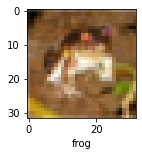

In [ ]:
plot_sample(X_train,y_train,0)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])



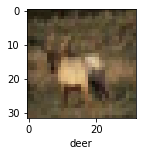

In [ ]:
plot_sample(X_train,y_train,3)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


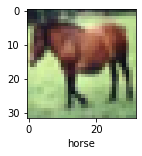

In [ ]:
plot_sample(X_train,y_train,7)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data


In [ ]:
X_train=X_train/255
X_test=X_test/255

Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([

    #cnn

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

     #dense layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

With CNN, at the end 100 epochs, accuracy was at around 98% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
batch_size = 32
num_classes = 10
epochs = 100

In [ ]:
history = cnn.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/100
1563/1563 [==============================] - 92s 59ms/step - loss: 0.0702 - accuracy: 0.9771
Epoch 2/100
1563/1563 [==============================] - 70s 45ms/step - loss: 0.0820 - accuracy: 0.9730
Epoch 3/100
1563/1563 [==============================] - 68s 44ms/step - loss: 0.0746 - accuracy: 0.9748
Epoch 4/100
1563/1563 [==============================] - 68s 44ms/step - loss: 0.0688 - accuracy: 0.9764
Epoch 5/100
1563/1563 [==============================] - 66s 42ms/step - loss: 0.0732 - accuracy: 0.9760
Epoch 6/100
1563/1563 [==============================] - 69s 44ms/step - loss: 0.0733 - accuracy: 0.9752
Epoch 7/100
1563/1563 [==============================] - 68s 44ms/step - loss: 0.0810 - accuracy: 0.9744
Epoch 8/100
1563/1563 [==============================] - 67s 43ms/step - loss: 0.0786 - accuracy: 0.9743
Epoch 9/100
1563/1563 [==============================] - 68s 44ms/step - loss: 0.0773 - accuracy: 0.9750
Epoch 10/100
1563/1563 [==============================]

In [ ]:
from tensorflow.keras.models import Model

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

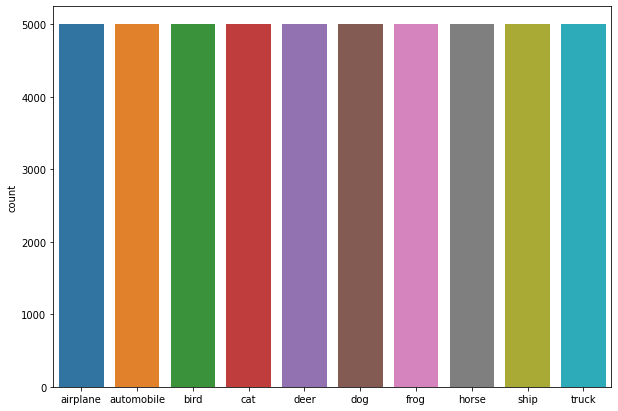

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

Loss and Accuracy Curve:

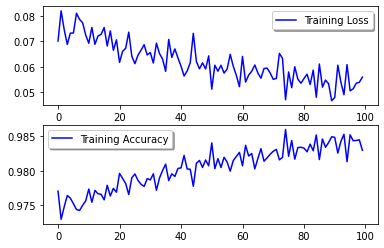

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Calculation of Confusion Matrix:

In [ ]:
y_pred = cnn.predict(X_test)

y_pred_classes = np.argmax(y_pred,axis = 1)

y_true = np.argmax(y_test,axis = 1)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 4s 12ms/step


[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

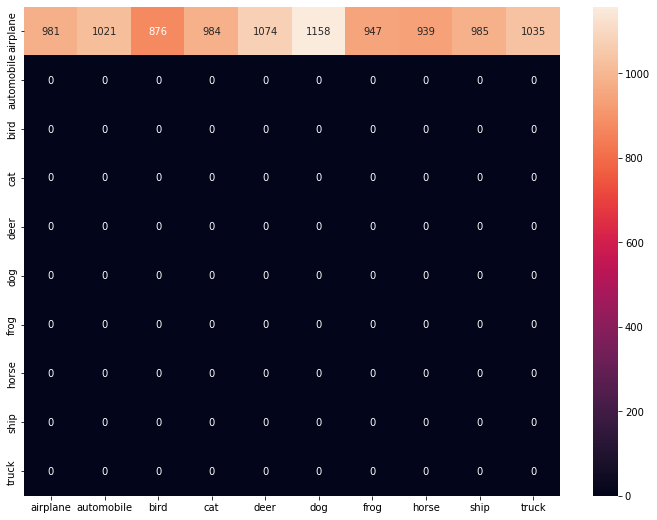

In [ ]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
        0.0000000e+00, 6.8261771e-15, 1.7268588e-20, 0.0000000e+00,
        1.2518328e-16, 0.0000000e+00],
       [3.5942329e-27, 9.9801230e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 8.3202141e-38, 2.7656082e-35,
        1.9875015e-03, 5.1404644e-12],
       [2.0678520e-01, 7.6650715e-01, 2.0504403e-17, 1.1453620e-12,
        3.7305916e-14, 9.0763329e-28, 2.3365505e-28, 3.8308802e-04,
        2.6324484e-02, 4.6819384e-08],
       [9.9999994e-01, 9.5588489e-11, 2.3515310e-18, 3.2714264e-23,
        1.9651769e-16, 4.1411641e-33, 4.5103902e-34, 4.3312532e-14,
        1.2344302e-11, 1.0303819e-16],
       [0.0000000e+00, 0.0000000e+00, 8.6974385e-15, 1.8053409e-08,
        1.9952024e-09, 1.8763422e-18, 9.9999994e-01, 0.0000000e+00,
        2.8505160e-16, 0.0000000e+00]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

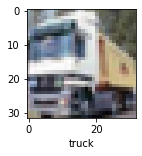

In [ ]:
plot_sample(X_train, y_train, 1)

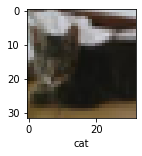

In [ ]:
plot_sample(X_train, y_train, 9)

In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,180,180,3)
  im_resize=img_3d
  prediction=model.predict(img_resize)[0]
  return{class_names[i]:float(prediction[i] for i in range(10))}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
